In [1]:
url = 'https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/doenca_cardiaca.csv'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presenca
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Ausencia
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presenca
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Ausencia
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Ausencia


Temos na primeira coluna a idade de cada um deles. Temos na segunda coluna o sexo biológico. E aqui nesse caso, quando o valor é igual a 1, é porque é o sexo biológico masculino. E quando é 0, é o sexo biológico feminino.

Na terceira coluna, temos o tipo de dor. Então, eles criaram uma escala que está indo de 1 até 4, que indica o tipo de dor no peito que essa pessoa está sentindo, que é algo que é característico de quem tem uma doença cardíaca. Em seguida, temos a pressão arterial de cada pessoa. Então, começamos aqueles exames médicos que comentei. Temos essa pressão arterial. Também temos o colesterol. Como está o nível de colesterol ali no sangue da pessoa.

Também temos o resultado da glicemia em jejum maior que 120. O que isso quer dizer? Quando está marcado com 0, é porque o valor da glicemia ali, da glicose em jejum da pessoa, não está maior que 120. E quando está maior que 120, o valor na tabela vai ser 1.

Temos depois, os resultados de eletrocardiograma. Então, é muito comum quando a pessoa tem ali a suspeita de uma doença cardíaca, fazer esse tipo de exame para analisar como estão os batimentos cardíacos.

Depois, temos os resultados de ECG, que temos os valores numéricos. Temos também a frequência cardíaca máxima de cada pessoa. E também temos uma coluna sobre dor no exercício. Nesse caso, essa pessoa fez o exercício e se ela sentiu dor, vai ter um valor igual a 1 atribuído nessa coluna. E se o valor for igual a 0, é porque a pessoa não teve dor no exercício.

Temos alguns resultados aqui de depressão ST e inclinação ST, que também são dados de eletrocardiogramas. Então, são resultados específicos para esse tipo de exame. Temos, então, valores numéricos para isso.

Também temos o resultado de número vasos fluro. Isso aqui, nesse caso, é um teste que é feito para verificar a coloração de vasos sanguíneos. É um exame específico para fazer isso. Temos valores numéricos também, como é possível observar. E temos aqui, por exemplo, um tal de teste de cintilografia, que também é um teste específico para verificar como estão os músculos do coração, onde temos também alguns valores numéricos.

E, por fim, temos a nossa coluna alvo, que é o nosso target, que é a doença cardíaca. Então, quando está marcado "Presença", é porque a pessoa tem doença cardíaca. Quando está marcado "Ausência", é porque a pessoa não tem.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
import seaborn as sns

<Axes: xlabel='Doenca cardiaca', ylabel='Idade'>

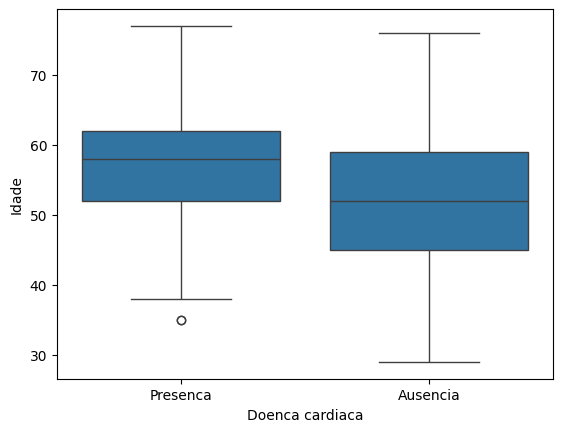

In [7]:
sns.boxplot(x='Doenca cardiaca', y='Idade', data=df)

<Axes: xlabel='Sexo', ylabel='count'>

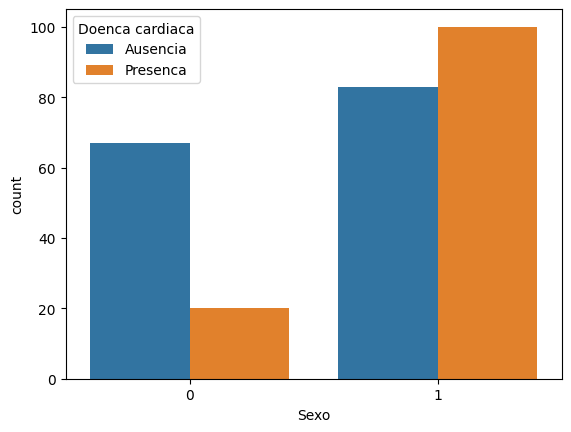

In [8]:
sns.countplot(x='Sexo', hue='Doenca cardiaca', data=df)

<Axes: xlabel='Tipo dor', ylabel='count'>

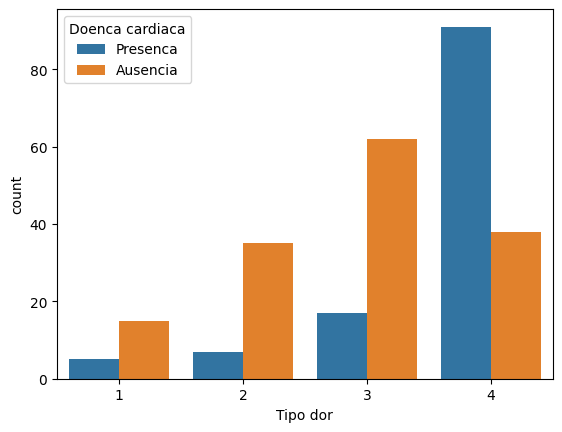

In [9]:
sns.countplot(x='Tipo dor', hue='Doenca cardiaca', data=df)


In [10]:
df['Doenca cardiaca'].value_counts()

,count
Doenca cardiaca,
Ausencia,150
Presenca,120


In [11]:
df['Doenca cardiaca'] = df['Doenca cardiaca'].map({'Presenca':1, 'Ausencia':0})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [13]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_treino, y_treino)
preds = dt.predict(X_teste)
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_teste, preds)
print(f'Acuracia: {acuracia:.2f}')

Acuracia: 0.76


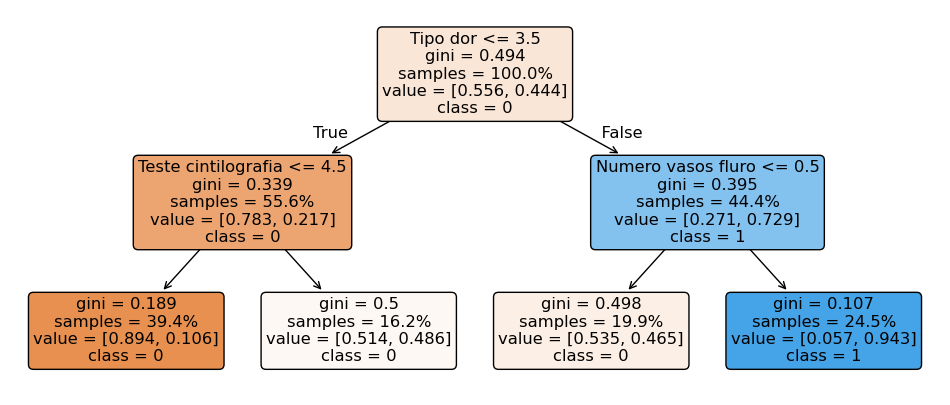

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

features = X_treino.columns
classes = [str(c) for c in dt.classes_]

plt.figure(figsize=(12,5))

plot_tree(dt,
          feature_names=features,
          class_names=classes,
          rounded=True,
          filled=True,
          proportion=True);

In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, preds)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        30
           1       0.87      0.54      0.67        24

    accuracy                           0.76        54
   macro avg       0.79      0.74      0.74        54
weighted avg       0.78      0.76      0.75        54



In [20]:
from sklearn.metrics import RocCurveDisplay

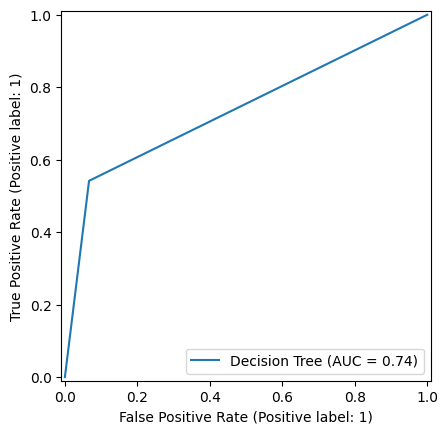

In [21]:
RocCurveDisplay.from_predictions(y_teste, preds, name='Decision Tree');

#### Classificando com XGBoost

In [22]:
import xgboost as xgb

In [23]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=3)

In [24]:
xg_cl.fit(X_treino, y_treino)
preds = xg_cl.predict(X_teste)
acuracia = accuracy_score(y_teste, preds)
print(f'Acuracia: {acuracia:.2f}')

Acuracia: 0.81


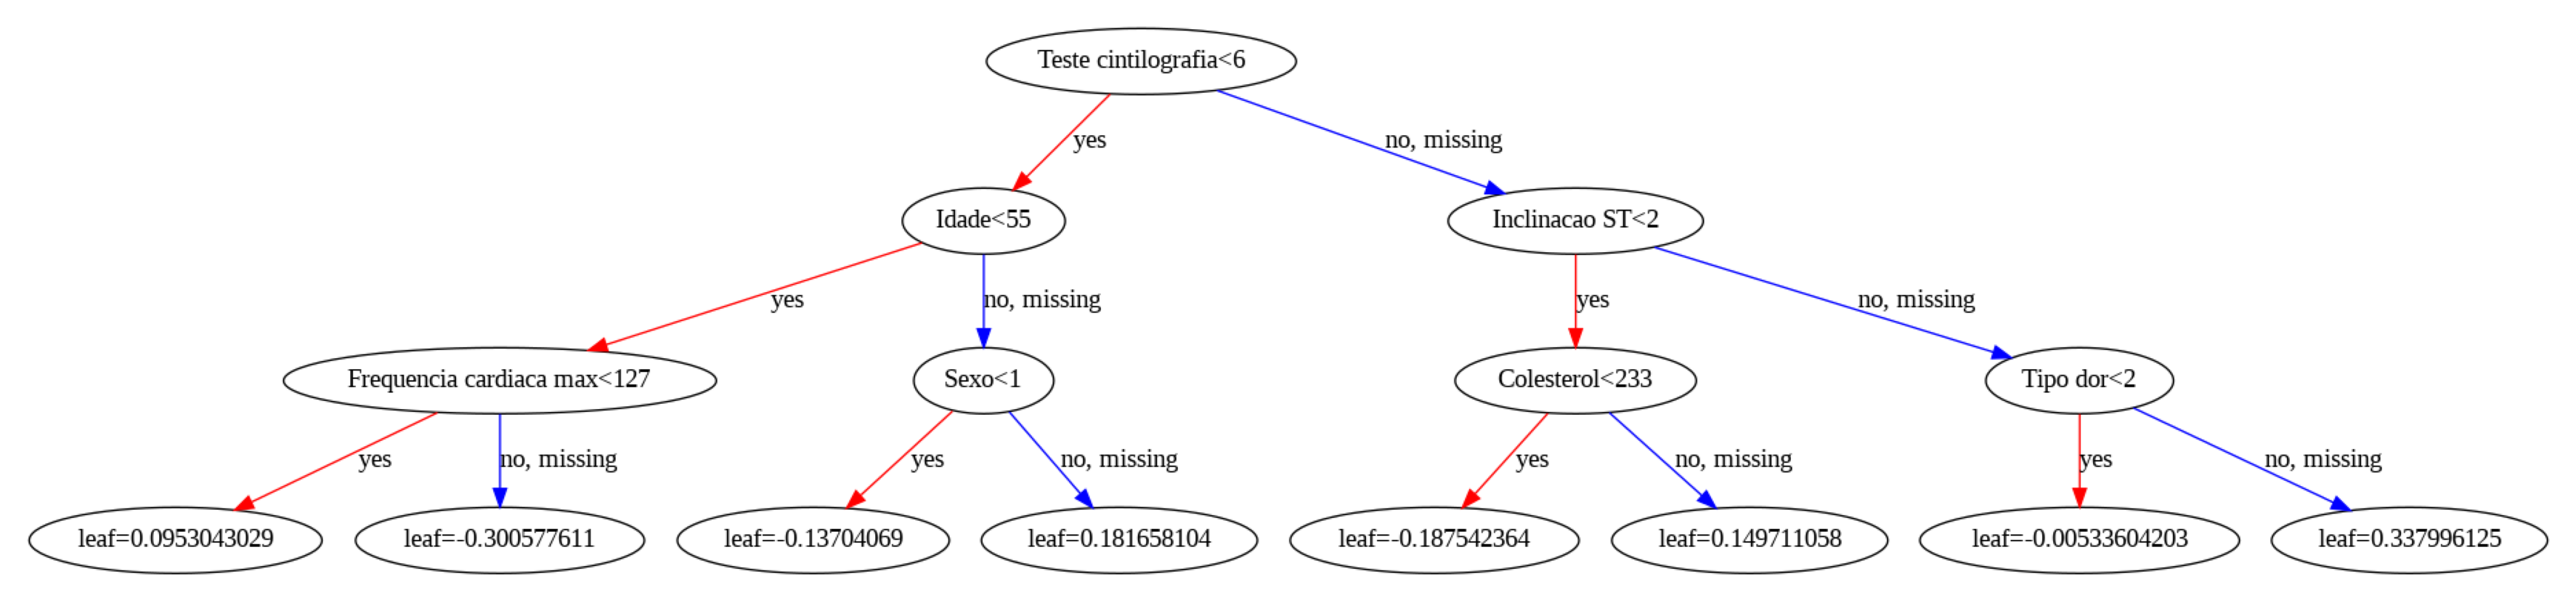

In [25]:
import matplotlib.pyplot as plt

# Configure o tamanho da figura e a resolução
plt.figure(figsize=(15, 5), dpi=300)  # Ajuste o tamanho e a resolução conforme necessário

# Plotar a árvore
xgb.plot_tree(xg_cl, num_trees=3, ax=plt.gca())
plt.show()

In [26]:
report = classification_report(y_teste, preds)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



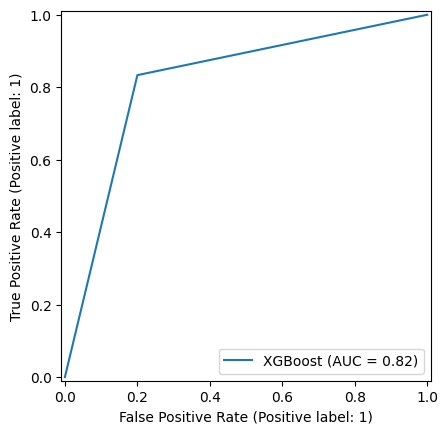

In [27]:
RocCurveDisplay.from_predictions(y_teste, preds, name='XGBoost')

Quanto o modelo erra

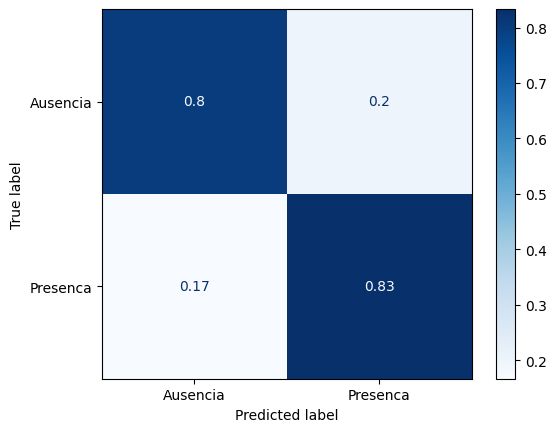

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xg_cl, X_teste, y_teste, display_labels=['Ausencia', 'Presenca'],
                                      normalize="true", cmap='Blues');

Dando robustez com validão cruzada

In [29]:
dmatrix = xgb.DMatrix(data=X, label=y)

In [30]:
params = {'objective': 'binary:logistic'}

In [31]:
cv_resultados = xgb.cv(
    dtrain=dmatrix,
    params=params,
    nfold=3,
    num_boost_round=5,
    metrics='error',
    as_pandas=True,
    seed=123)
print(cv_resultados)
print("\n\n")

acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia:.2f}')

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.138889         0.023570         0.288889        0.055184
1          0.081481         0.010476         0.262963        0.010476
2          0.068519         0.013858         0.248148        0.037771
3          0.050000         0.007857         0.229630        0.010476
4          0.046296         0.010476         0.222222        0.018144



Acuracia: 0.78


In [32]:
cv_resultados = xgb.cv(
    dtrain=dmatrix,
    params=params,
    nfold=3,
    num_boost_round=50,
    metrics='error',
    as_pandas=True,
    seed=123)
print(cv_resultados)
print("\n\n")

acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia:.2f}')

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.138889         0.023570         0.288889        0.055184
1           0.081481         0.010476         0.262963        0.010476
2           0.068519         0.013858         0.248148        0.037771
3           0.050000         0.007857         0.229630        0.010476
4           0.046296         0.010476         0.222222        0.018144
5           0.033333         0.013608         0.214815        0.013858
6           0.024074         0.006929         0.207407        0.013858
7           0.022222         0.007857         0.225926        0.010476
8           0.020370         0.009443         0.218519        0.005238
9           0.016667         0.004536         0.225926        0.013858
10          0.014815         0.005238         0.218519        0.010476
11          0.012963         0.006929         0.218519        0.013858
12          0.012963         0.006929         0.218519        0.010476
13    

Não melhora depois de um certo tempo e começa a ter overfitting.

Aplicaremos agora um early stop

In [33]:
cv_resultados = xgb.cv(
    dtrain=dmatrix,
    params=params,
    nfold=3,
    num_boost_round=100,
    early_stopping_rounds=5,
    metrics='error',
    as_pandas=True,
    seed=123)
print(cv_resultados)
print("\n\n")

acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia:.2f}')

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.138889         0.023570         0.288889        0.055184
1          0.081481         0.010476         0.262963        0.010476
2          0.068519         0.013858         0.248148        0.037771
3          0.050000         0.007857         0.229630        0.010476
4          0.046296         0.010476         0.222222        0.018144
5          0.033333         0.013608         0.214815        0.013858
6          0.024074         0.006929         0.207407        0.013858



Acuracia: 0.79


Ajustando hiperparametros para a melhora do modelo. | Parameters for Tree Booster

In [34]:
params = {'objective': 'binary:logistic',
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth':5}

cv_resultados = xgb.cv(
    dtrain=dmatrix,
    params=params,
    nfold=3,
    num_boost_round=100,
    early_stopping_rounds=5,
    metrics='error',
    as_pandas=True,
    seed=123)
print(cv_resultados)
print("\n\n")

acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia:.2f}')

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.307407         0.061586         0.359259        0.135881
1           0.262963         0.093661         0.344444        0.148518
2           0.224074         0.057794         0.292593        0.109369
3           0.177778         0.065420         0.318519        0.082319
4           0.166667         0.040318         0.259259        0.063721
5           0.153704         0.032815         0.255556        0.047140
6           0.133333         0.024003         0.244444        0.039545
7           0.125926         0.013095         0.240741        0.026189
8           0.107407         0.013858         0.233333        0.024003
9           0.105556         0.012001         0.229630        0.020951
10          0.101852         0.013095         0.229630        0.005238
11          0.096296         0.009443         0.218519        0.020951
12          0.092593         0.011416         0.211111        0.015713
13    

"Chutar" hiperparametros não é a melhor maneira de melhorar um modelo. Vejamos algumas técnicas.

#### Random Search

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
params = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [0,2,4,6,10],
    'colsample_bytree': [0.1,0.5,1],
    'n_estimators': [10,25,50]
}

modelo_xgb = xgb.XGBClassifier()

random_s_cv = RandomizedSearchCV(estimator=modelo_xgb,
                                 param_distributions=params,
                                 cv=4,
                                 scoring='accuracy',
                                 verbose=1)

random_s_cv.fit(X,y)



print('Melhores parametros encontrados: ', random_s_cv.best_params_)
print('Acuracia: ', random_s_cv.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Melhores parametros encontrados:  {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 1}
Acuracia:  0.8409240561896401


#### GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [0,2,4,6,10],
    'colsample_bytree': [0.1,0.5,1],
    'n_estimators': [10,25,50]
}

modelo_xgb = xgb.XGBClassifier()

grid_s_cv = GridSearchCV(estimator=modelo_xgb,
                         param_grid=params,
                         cv=4,
                         scoring='accuracy',
                         verbose=1)

grid_s_cv.fit(X,y)
print('Melhores parametros encontrados: ', grid_s_cv.best_params_)
print('Acuracia: ', grid_s_cv.best_score_)



Fitting 4 folds for each of 135 candidates, totalling 540 fits
Melhores parametros encontrados:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Acuracia:  0.8409240561896401


#### Analisando métricas

In [38]:
xg_cl_ajustado = xgb.XGBClassifier(objective='binary:logistic',
                                   colsample_bytree=1,
                                   learning_rate=0.1,
                                   max_depth=2,
                                   n_estimators=50)

xg_cl_ajustado.fit(X_treino, y_treino)

preds = xg_cl_ajustado.predict(X_teste)

ac = accuracy_score(y_teste, preds)
print(f'Acuracia: {acuracia:.2f}')

Acuracia: 0.84


In [39]:
report = classification_report(y_teste, preds)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



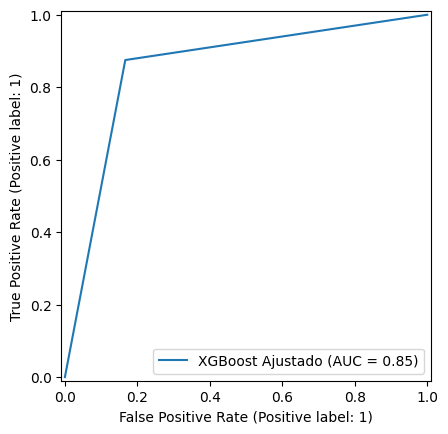

In [40]:
RocCurveDisplay.from_predictions(y_teste, preds, name='XGBoost Ajustado');

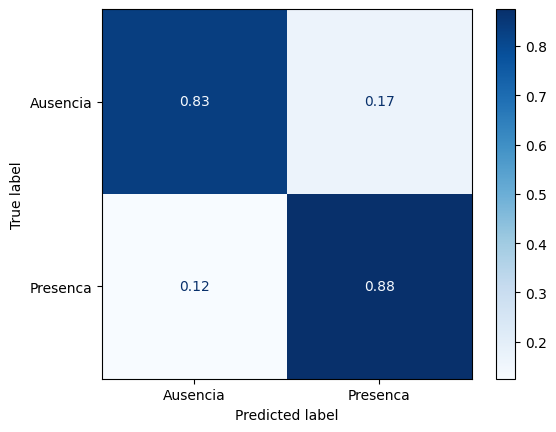

In [41]:
ConfusionMatrixDisplay.from_estimator(xg_cl_ajustado, X_teste, y_teste, display_labels=['Ausencia', 'Presenca'],
                        normalize="true",
                        cmap='Blues');

#### XGBoost no Pipeline

In [42]:
from sklearn.pipeline import Pipeline

In [44]:
pipeline = Pipeline([('xgboost', xgb.XGBClassifier())])

xgb_param_grid = {
    'xgboost__learning_rate': [0.1,0.2,0.3],
    'xgboost__max_depth': [0,2,4,6,10],
    'xgboost__colsample_bytree': [0.1,0.5,1],
    'xgboost__n_estimators': [10, 25, 50]
}

grid_search_cv = GridSearchCV(estimator=pipeline,
                              param_grid=xgb_param_grid,
                              scoring='accuracy',
                              cv=4,
                              verbose=1)

grid_search_cv.fit(X,y)

print('Acuracia: ', grid_search_cv.best_score_)
print('Melhor estimador : ', grid_search_cv.best_estimator_)


Fitting 4 folds for each of 135 candidates, totalling 540 fits
Acuracia:  0.8409240561896401
Melhor estimador :  Pipeline(steps=[('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                  

Salvando o modelo

In [45]:
import joblib

joblib.dump(grid_search_cv, 'modelo_pipeline.pkl')

['modelo_pipeline.pkl']

Exemplo de uso de Pipeline com mais etapas para o modelo

In [46]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.over_sampling import SMOTE
# import xgboost as xgb

# pipeline = Pipeline([
#                      ('onehot', OneHotEncoder()),
#                      ('oversample', SMOTE()),
#                      ('xgb', xgb.XGBClassifier())
#                     ])

# cross_val_scores = cross_val_score(pipeline, X, y, scoring='recall', cv=3)

#### Utilizando o modelo com dados novos

In [48]:
modelo = joblib.load('modelo_pipeline.pkl')

In [49]:
url = 'https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/pacientes_novos.csv'

In [50]:
novos = pd.read_csv(url)

In [51]:
novos

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3
5,70,0,1,140,239,0,0,151,0,1.8,1,2,3
6,42,0,4,132,341,1,2,136,1,3.0,2,0,7
7,34,0,1,150,283,1,2,162,0,1.0,1,0,3
8,52,1,1,118,186,0,2,190,0,0.0,2,0,6
9,35,1,4,112,245,0,0,150,0,1.0,2,2,3


In [52]:
previsoes = modelo.predict(novos)

In [53]:
previsoes

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [54]:
probabilidades = modelo.predict_proba(novos)

In [55]:
probabilidades

array([[0.47394192, 0.5260581 ],
       [0.8558974 , 0.14410257],
       [0.73324203, 0.26675797],
       [0.7878467 , 0.21215333],
       [0.95727295, 0.04272704],
       [0.8929907 , 0.10700932],
       [0.09207231, 0.9079277 ],
       [0.8851794 , 0.11482063],
       [0.9037258 , 0.0962742 ],
       [0.20894748, 0.7910525 ]], dtype=float32)

Primeira coluna como probablidade de ser 0

Segunda coluna como probabilidade de ser 1

In [56]:
df_novos = pd.DataFrame(novos)

df_novos['previsoes'] = previsoes

df_novos

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,previsoes
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7,1
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3,0
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3,0
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3,0
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3,0
5,70,0,1,140,239,0,0,151,0,1.8,1,2,3,0
6,42,0,4,132,341,1,2,136,1,3.0,2,0,7,1
7,34,0,1,150,283,1,2,162,0,1.0,1,0,3,0
8,52,1,1,118,186,0,2,190,0,0.0,2,0,6,0
9,35,1,4,112,245,0,0,150,0,1.0,2,2,3,1
